In [38]:
import umap
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
import seaborn as sns

In [2]:
csv = '/fast/rsna-breast/tables/attn_scores_img_giddy_rain.csv'
df = pd.read_csv(csv)
df

,ptID,imgID,row,col,attention
0,106,76321767,0,0,0.011063
1,106,76321767,1,0,0.000384
2,106,76321767,1,1,0.005881
3,106,76321767,2,0,0.000078
4,106,76321767,2,1,0.000284
...,...,...,...,...,...
114125,65492,1306638994,15,1,0.010106
114126,65492,1306638994,15,2,0.000021
114127,65492,1306638994,15,3,0.000686
114128,65492,1306638994,16,0,0.001206


In [11]:
df.attention.round(2).value_counts().head(10)

0.00    97538
0.01     8570
0.02     2389
0.03     1184
0.04      709
0.05      517
0.06      370
0.07      299
0.08      214
0.09      191
Name: attention, dtype: int64

In [57]:
df.attention.round(2).clip(upper=0.09).value_counts().head(10)

0.00    97538
0.01     8570
0.02     2389
0.09     2340
0.03     1184
0.04      709
0.05      517
0.06      370
0.07      299
0.08      214
Name: attention, dtype: int64

In [12]:
df['attn'] = df.attention.round(2).clip(upper=0.09)

In [ ]:
df = df.sort_values(['ptID', 'imgID', 'row', 'col'])

In [24]:
tensors = []
newDF = []
#for rn, row in tqdm(df.iterrows(), total=len(df)):
groups = df.groupby(['ptID','imgID'])
for (ptID, imgID), imgDF in tqdm(groups, total=len(groups)):
    tf = f'/fast/rsna-breast/features/tc_efficientnetb3_0.04/{ptID}/{imgID}.pt'
    t = torch.load(tf)
    assert len(imgDF)==len(t)
    tensors.append(t.numpy())
    newDF.append(imgDF)
    #print(t.shape)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1158/1158 [00:04<00:00, 282.14it/s]


In [33]:
#newDF = pd.concat(newDF)
allTensors = np.vstack(tensors)

In [34]:
allTensors.shape, newDF.shape

((114130, 1536), (114130, 6))

In [35]:
import umap
U = umap.UMAP()

In [37]:
emb = U.fit_transform(allTensors)

In [39]:
newDF['x'] = emb[:,0]
newDF['y'] = emb[:,1]

<AxesSubplot: xlabel='x', ylabel='y'>

/home/cosmo/miniconda3/envs/mammography/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/cosmo/miniconda3/envs/mammography/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


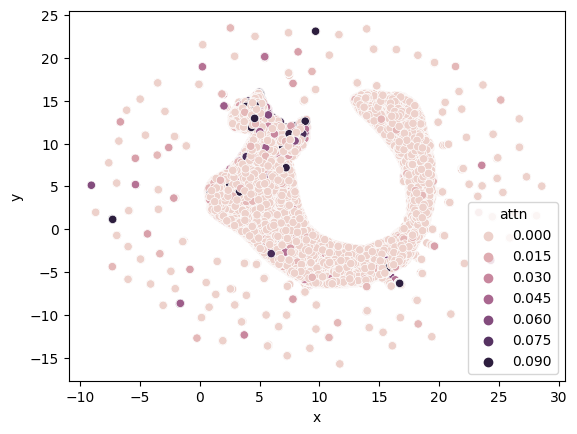

In [40]:
sns.scatterplot(data=newDF, x='x', y='y', hue='attn')

In [41]:
newDF['thresh'] = newDF.attention>0.04

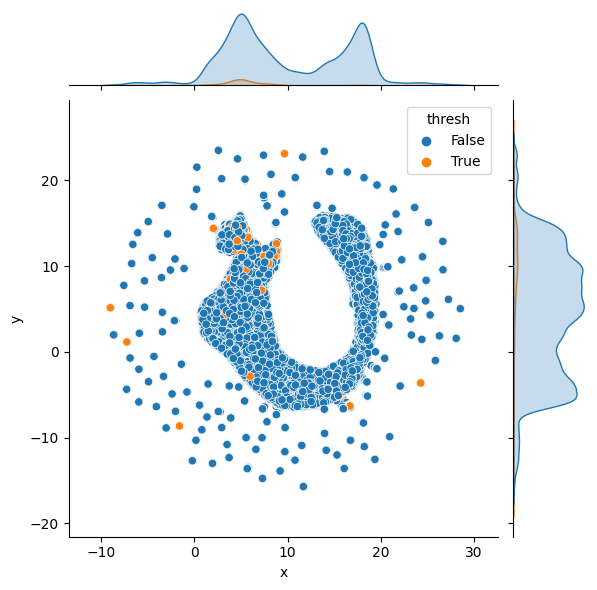

In [43]:
sns.jointplot(data=newDF, x='x', y='y', hue='thresh')

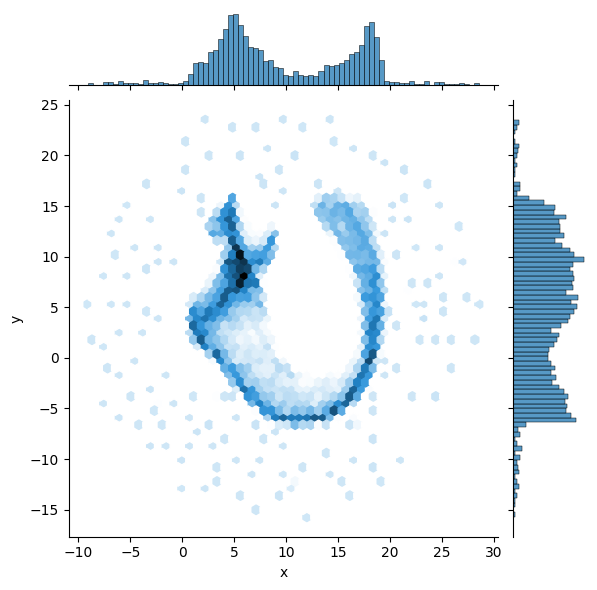

In [44]:
sns.jointplot(data=newDF, x='x', y='y', kind='hex')

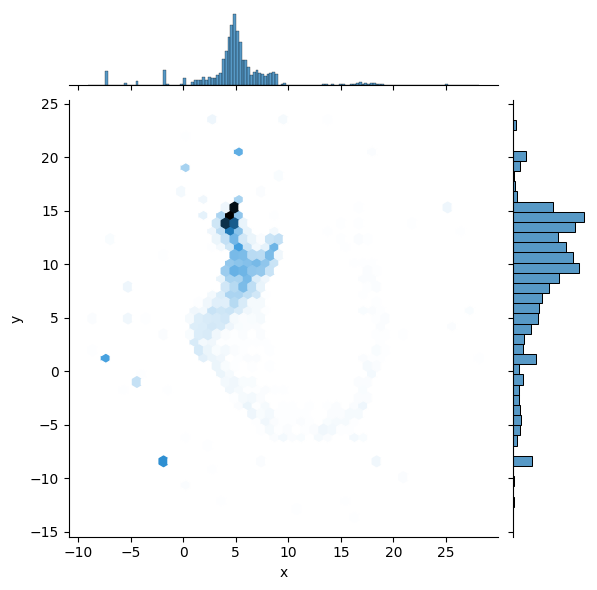

In [45]:
sns.jointplot(data=newDF[newDF.attention>0.05], x='x', y='y', kind='hex')

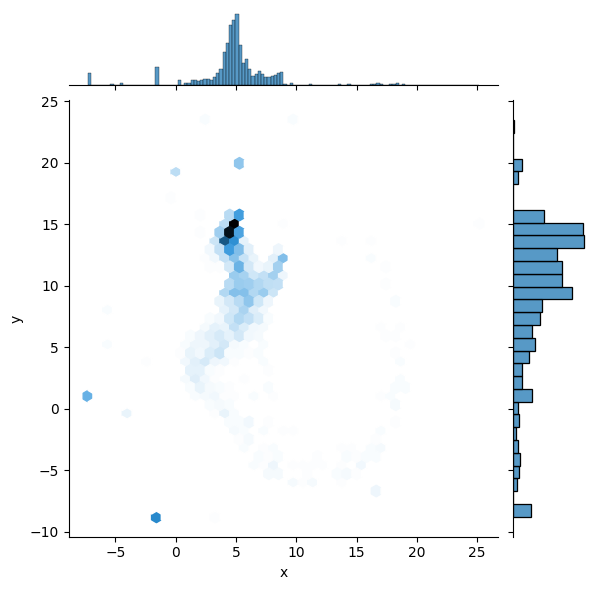

In [48]:
sns.jointplot(data=newDF[newDF.attention>0.1], x='x', y='y', kind='hex')

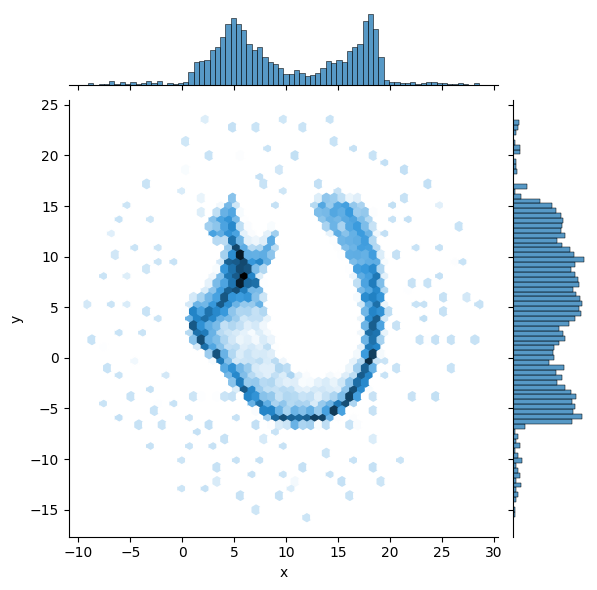

In [50]:
sns.jointplot(data=newDF[newDF.attention<0.01], x='x', y='y', kind='hex')

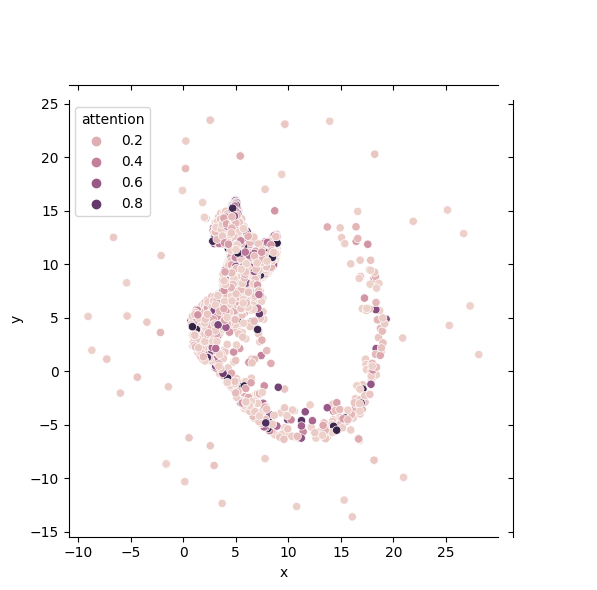

In [47]:
sns.jointplot(data=newDF[newDF.attention>0.05], x='x', y='y', hue='attention')

In [51]:
attenDF = pd.read_csv('/fast/rsna-breast/tables/attn_scores_all_giddy_rain.csv')#.set_index(['imgID', 'row', 'col'])


In [54]:
attenDF[attenDF.attention >= 0.5].shape

(18195, 5)